This notebook was made as a sumbission for big data challenge as a part of Satria Data Competition held by Puspresnas. The problem is to predict the gender from the given picture. 

The training dataset that was given contains 770 folders where each folder contains 3 pictures. Each folder can contain 3 pictures from different person's photos. There is also csv files that gives information regarding the training dataset contains name of folder, gender, and age. 

The objective is to predict the gender from the testing files that contains 990 pictures. 

**Here's  what I did to solve the problem**
1. import the datasets
2. import libraries
3. detect face in each pictures in every folder using deepface library (it was allowed to use pretrained model for data preprocessing)
4. compare 3 faces in every folder using deepface to check whether they are the same person or not. if there is different face between 3 faces, then that face will be dropped
5. make sure the dataset is ready for the input of the model. so there will be approximately 770*3 pictures that will be used as training data. 
6. build the model using cnn to classify the gender. 
7. ensure that testing data is in accordance with what the model requires
8. predict the gender from testing data 

In [66]:
!pip install deepface

In [28]:
#Import libraries
from deepface import DeepFace
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as L

In [7]:
base_dir = '/kaggle/input/picturebdc'
train_dir = base_dir + '/Training/'
test_dir = base_dir + '/Testing/'
train_csv = pd.read_csv('/kaggle/input/picturebdc/train.csv')
train = os.listdir(train_dir)
test = os.listdir(test_dir)
print("number of training folder is " + str(len(train)))
print("number of testing picture is " + str(len(test)))

number of training folder is 770
number of testing picture is 990


In [8]:
#there are 3 pictures in every training folder
train_folder_4 = train_dir + '4'
t = os.listdir(train_folder_4)
print(t)

['4_1.jpg', '4_3.jpg', '4_2.jpg']


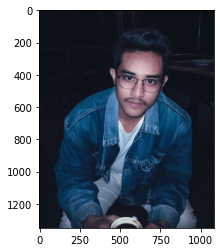

In [9]:
ex_pict = os.path.join(train_folder_4, t[2])
img = mpimg.imread(ex_pict)
imgplot = plt.imshow(img)

**Data Preprocessing**
* detect faces in each picture in every folder
*  compare 3 faces in every folder using deepface to check whether they are the same person or not. if there is different face between 3 faces, then that face will be dropped

In [ ]:
""" I don't run this cell since I had run it in the previous notebook, and it took long 
time to run, so I downloaded the output from the previous notebook and upload in this 
notebook named resultfacedetection
"""
#
def cleaning(path):
    for file in os.listdir(path):
        file_dir = (os.path.join(path, file))
        for pict in os.listdir(file_dir):
            pict_dir = os.path.join(file_dir, pict)
            try:
                detected_face = DeepFace.detectFace(img_path = pict_dir , detector_backend = 'mtcnn')
                imgplot = plt.imshow(detected_face, interpolation='nearest')
                plt.axis('off')
                plt.savefig(pict, bbox_inches='tight', format='jpg')
            except:
                print('no person in '+ pict_dir)
cleaning(train_dir)

In [10]:
print("The number of faces can be detected is "+ str(len(os.listdir('../input/resultfacedetection/result_face_detection'))))

The number of faces can be detected is 2310


In [11]:
def compare(path):
    a = []
    for x in range (1, 771):
        imgdir = path+str(x)+'_'
        img = []
        for y in range(1, 4):
            img.append(imgdir+str(y)+'.jpg')
        try:
            result1 = DeepFace.verify(img1_path = img[0], img2_path = img[1], detector_backend='mtcnn')
            result2 = DeepFace.verify(img1_path = img[0], img2_path = img[2], detector_backend='mtcnn')
            if ((result1['verified']==False) and (result2['verified']==False)):
                a.append(((x-1)*3))
            elif ((result1['verified']==False) and (result2['verified']==True)):
                a.append(((x-1)*3)+1)
            elif ((result1['verified']==True) and (result2['verified']==False)):
                a.append(((x-1)*3)+2)
        except:
            print('face cannnot be detected in '+imgdir)
    print(a)
    return(a)
dropped = compare("../input/resultfacedetection/result_face_detection/")

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:42<00:00, 13.7MB/s] 


face cannnot be detected in ../input/resultfacedetection/result_face_detection/284_
face cannnot be detected in ../input/resultfacedetection/result_face_detection/308_
face cannnot be detected in ../input/resultfacedetection/result_face_detection/323_
[64, 67, 82, 101, 121, 139, 156, 192, 246, 311, 319, 325, 382, 411, 446, 463, 478, 595, 607, 618, 629, 647, 660, 670, 723, 764, 773, 788, 806, 815, 821, 844, 925, 964, 987, 994, 1052, 1124, 1144, 1151, 1196, 1203, 1214, 1257, 1372, 1402, 1417, 1423, 1445, 1463, 1505, 1603, 1654, 1669, 1750, 1760, 1765, 1832, 1853, 1950, 1959, 2005, 2018, 2021, 2062, 2150, 2159, 2189, 2263, 2304]


In [12]:
train_csv.head()

,nomor,jenis kelamin,usia
0,1,0,27
1,2,1,24
2,3,0,29
3,4,1,23
4,5,0,20


In [14]:
df = pd.concat([train_csv]*3, ignore_index=True)
df = df.sort_values(by=['nomor'], ignore_index=True)
df

,nomor,jenis kelamin,usia
0,1,0,27
1,1,0,27
2,1,0,27
3,2,1,24
4,2,1,24
...,...,...,...
2305,769,0,23
2306,769,0,23
2307,770,0,27
2308,770,0,27


In [15]:
img_dir = '../input/resultfacedetection/result_face_detection/'
image = [img_dir+str(i)+'_'+str(j)+'.jpg' for i in range(1,771) for j in range(1, 4)]
image[0:3]

['../input/resultfacedetection/result_face_detection/1_1.jpg',
 '../input/resultfacedetection/result_face_detection/1_2.jpg',
 '../input/resultfacedetection/result_face_detection/1_3.jpg']

In [16]:
df['image']= image
df.head()

,nomor,jenis kelamin,usia,image
0,1,0,27,../input/resultfacedetection/result_face_detec...
1,1,0,27,../input/resultfacedetection/result_face_detec...
2,1,0,27,../input/resultfacedetection/result_face_detec...
3,2,1,24,../input/resultfacedetection/result_face_detec...
4,2,1,24,../input/resultfacedetection/result_face_detec...


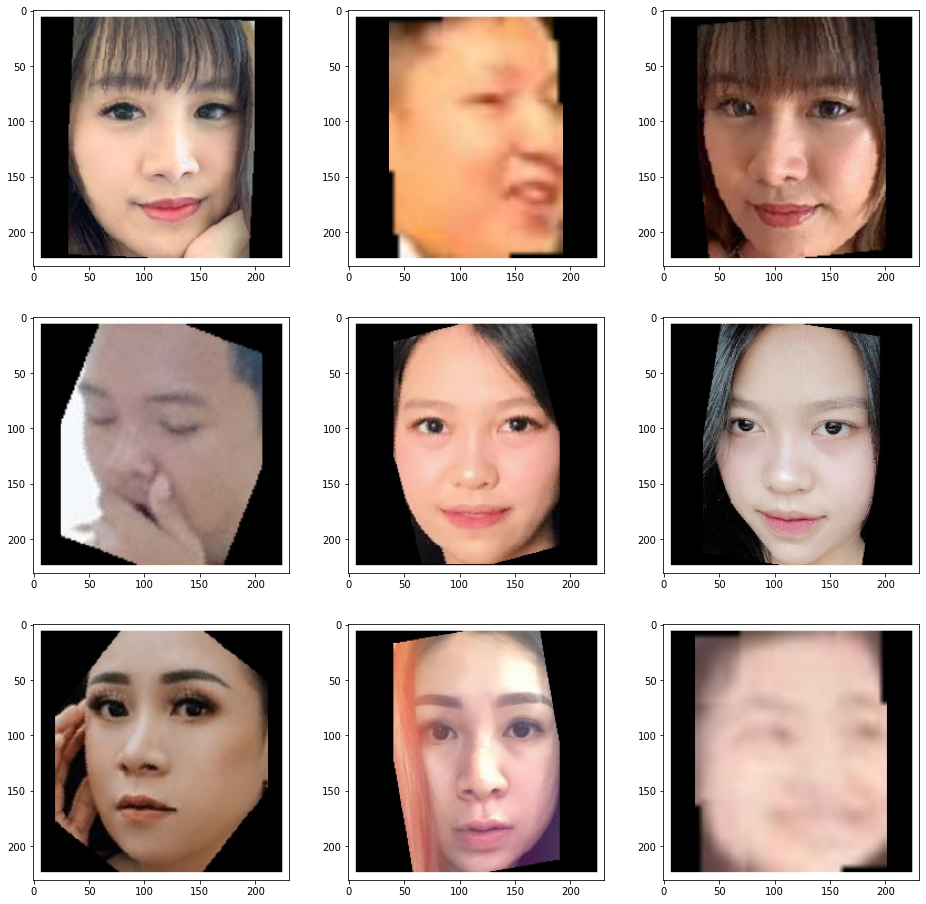

In [18]:
undetected = [img_dir+'284_1.jpg', img_dir+'284_2.jpg', img_dir+'284_3.jpg', 
              img_dir+'308_1.jpg', img_dir+'308_2.jpg', img_dir+'308_3.jpg',
              img_dir+'323_1.jpg', img_dir+'323_2.jpg', img_dir+'323_3.jpg']

fig = plt.figure(figsize=(16, 16))
for i in range(1,10):
    img = plt.imread(undetected[i-1])
    fig.add_subplot(3, 3, i)
    plt.imshow(img)
plt.show()

In [19]:
#the blur/undetected pictures above will be removed
folder = [284, 308, 323]
gambar_ke = [2, 1, 3]
dropped = list(map(lambda x,y: (x-1)*3+(y-1), folder, gambar_ke))
dropped

[850, 921, 968]

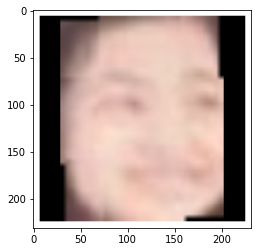

In [22]:
im = plt.imread(image[968])
plt.imshow(im)

In [21]:
# This is a list of different face from faces in the same folder
not_same = [64, 67, 82, 101, 121, 139, 156, 192, 246, 311, 
            319, 325, 382, 411, 446, 463, 478, 595, 607, 618,
            629, 647, 660, 670, 723, 764, 773, 788, 806, 815,
            821, 844, 925, 964, 987, 994, 1052, 1124, 1144, 
            1151, 1196, 1203, 1214, 1257, 1372, 1402, 1417,
            1423, 1445, 1463, 1505, 1603, 1654, 1669, 1750,
            1760, 1765, 1832, 1853, 1950, 1959, 2005, 2018,
            2021, 2062, 2150, 2159, 2189, 2263, 2304]
for x in not_same:
    dropped.append(x)
len(dropped)

73

In [23]:
df = df.drop(dropped)
df = df.reset_index(drop=True)
df

,nomor,jenis kelamin,usia,image
0,1,0,27,../input/resultfacedetection/result_face_detec...
1,1,0,27,../input/resultfacedetection/result_face_detec...
2,1,0,27,../input/resultfacedetection/result_face_detec...
3,2,1,24,../input/resultfacedetection/result_face_detec...
4,2,1,24,../input/resultfacedetection/result_face_detec...
...,...,...,...,...
2232,769,0,23,../input/resultfacedetection/result_face_detec...
2233,769,0,23,../input/resultfacedetection/result_face_detec...
2234,770,0,27,../input/resultfacedetection/result_face_detec...
2235,770,0,27,../input/resultfacedetection/result_face_detec...


In [45]:
img_arr=[]
for file in df['image']:
    img = plt.imread(file)
    #img = img[10:220, 30:210]
    img = cv2.resize(img,dsize=(64, 64))
    #img = img.reshape((img.shape[0],img.shape[1],3))
    img_arr.append(img)

In [49]:
X = np.array(img_arr)/255
print(X.shape)
y = df['jenis kelamin']
print(len(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=37
)

(2237, 64, 64, 3)
2237


In [55]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(64,64,3)),
    L.Conv2D(32, (3, 3), activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)              

In [56]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64)#

Epoch 1/25
28/28 [==============================] - 1s 9ms/step - loss: 0.6545 - accuracy: 0.6590
Epoch 2/25
28/28 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.7747
Epoch 3/25
28/28 [==============================] - 0s 7ms/step - loss: 0.4600 - accuracy: 0.7971
Epoch 4/25
28/28 [==============================] - 0s 7ms/step - loss: 0.4238 - accuracy: 0.8004
Epoch 5/25
28/28 [==============================] - 0s 7ms/step - loss: 0.3936 - accuracy: 0.8228
Epoch 6/25
28/28 [==============================] - 0s 7ms/step - loss: 0.3726 - accuracy: 0.8373
Epoch 7/25
28/28 [==============================] - 0s 7ms/step - loss: 0.3406 - accuracy: 0.8569
Epoch 8/25
28/28 [==============================] - 0s 7ms/step - loss: 0.3180 - accuracy: 0.8698
Epoch 9/25
28/28 [==============================] - 0s 7ms/step - loss: 0.3088 - accuracy: 0.8787
Epoch 10/25
28/28 [==============================] - 0s 7ms/step - loss: 0.2804 - accuracy: 0.8804
Epoch 11/25
28/28 [

In [58]:
loss, acc = model.evaluate(X_test,y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2198348343372345
Test Accuracy: 0.9241071343421936


In [59]:
test_data = pd.read_csv('../input/picturebdc/submission.csv')
test_data

,id
0,005093b2-8c4b-4ed7-91c3-f5f4d50f8d27
1,0052554e-069e-4c43-beb0-0885e8f7684e
2,0092b954-1143-4a95-a17b-1edfa6af3b01
3,009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16
4,00d0e306-06fe-45d8-ae6c-6f83ab8f7810
...,...
985,feb9e70f-4182-4500-866d-9b95657e727c
986,fed67ed2-620a-4ebf-b61e-16ef3d9b93f7
987,ff14c77e-c3c2-46db-9341-30de4130ef8a
988,ff662f3f-8c76-4d27-a73e-c43c4353f798


In [60]:
img_res = []
files = test_data['id']
#testingbdc is a folder where faces in testing pictures have been detected
path_res = '../input/testingbdc/' 
for file in files:
    img = plt.imread(path_res+file+'.jpg')
    img = cv2.resize(img,dsize=(64,64))
    img_res.append(img)
X_res = np.array(img_res)/255
print(X_res.shape)

(990, 64, 64, 3)


In [61]:
def get_gender(prob):
    if prob < 0.5: 
        return 0 #female
    else: 
        return 1 #male

In [62]:
val = model.predict(X_res)
res = [get_gender(i) for i in val]
test_data['jenis kelamin'] = res
test_data

,id,jenis kelamin
0,005093b2-8c4b-4ed7-91c3-f5f4d50f8d27,1
1,0052554e-069e-4c43-beb0-0885e8f7684e,1
2,0092b954-1143-4a95-a17b-1edfa6af3b01,0
3,009fc28b-fe9b-441d-b8a2-ea8b7ae6ca16,0
4,00d0e306-06fe-45d8-ae6c-6f83ab8f7810,1
...,...,...
985,feb9e70f-4182-4500-866d-9b95657e727c,0
986,fed67ed2-620a-4ebf-b61e-16ef3d9b93f7,0
987,ff14c77e-c3c2-46db-9341-30de4130ef8a,1
988,ff662f3f-8c76-4d27-a73e-c43c4353f798,1


In [63]:
#Result
test_data.to_csv('resultfix1.csv', index=False)

In [64]:
def display(img):
    plt.imshow(img)
    #plt.set_cmap('gray')
    plt.show()

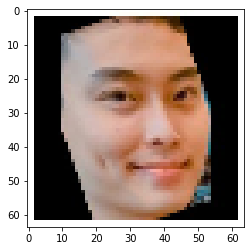

1
0a59a0b9-aa41-4f21-bd25-a4a8bdd362c4


In [65]:
gender = test_data['jenis kelamin']
file = test_data['id']
index = 45
display(X_res[index])
print(gender[index])
print(file[index])